<a href="https://colab.research.google.com/github/huynhdongnguyen/Projects.github.io/blob/master/Final_capstone_Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Medical Cost Personal: Find predictive variable </h1>
<img align = "center" src="http://4.bp.blogspot.com/-Vg9WZCxRLcM/VWy0ZpYkXgI/AAAAAAAAAlo/meSgW-ptrYU/s1600/Blog%2BMedicine.jpg" width=300>

<h2> I. Data infomation : </h2> Data are taken from: https://www.kaggle.com/teertha/ushealthinsurancedataset

+ "age": age of primary beneficiary
+ "sex": insurance contractor gender (female, male)
+ "bmi": Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height.
+ "children": Number of children covered by health insurance / Number of dependents
+ "smoker": Smoking (yes, no)
+ "region": the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
+ "charges": Individual medical costs billed by health insurance

<h2>II. Project sumary </h2>

The main target of this project is to show ways to go deep into the data story-telling. 

In in project, we will try to work on a model that could give an approximation as to what will be the charges of the patients. we will also try to understand what factors influenced the charge of patients. A summary story behind the patients in this dataset to show what factors that feature the true patient charge will be discussed.

<h2>III. Table of Contents: </h2>

<h3> 1. Data preparation </h3>

a)	Data importing & data description

b)	Data cleaning, analysis and hypothesis

c)	Parameters considered in this work

d)	Libraries importing

e)	Functions for general use

<h3> 2. Distribution and correlation analysis of variables </h3>

a)	Parameters correlation (pair)

b)	Distribution of “charges”

c)	Distribution of “bmi”

d)	Distribution of “age”

<h3> 3. Key parameters </h3>

a)	BMI and Weight category

b)	Age and Age category

c)	Charges vs other parameters

d)	BMI vs other parameters

e)	Special case study

<h3> 4. Statistics </h3>

a)	Sex vs smoker

b)	Children vs number of patients

c)	Region vs number of patients

d)	Do charges of people who smoke differ significantly from the people who 
don't?

e)	Does charges of Obese differ significantly from that of under_weights?

f)	Does charges of males differ significantly from that of females?

g)	Does charges of Aldults differ significantly from that of Elders?

h)	Does BMI of males differ significantly from that of females?

i)	Does BMI of Youngs differ significantly from that of Elders?

j)	Does charges of northeast differ significantly from that of southeast?

k)	Does BMI of northeast differ significantly from that of southwest?

l)	Does charges of patient without children differ significantly from that of having 2 children?

<h3> 5. Key factors correlation </h4>

a)	Correlation of charges in function of age and smoker & sex

b)	Correlation of charges in function of age and smoker & weight

c)	Correlation of charges in function of bmi and smoker & sex

d)	Correlation of charges in function of bmi and children number

<h3> 6. Conclusions and recommendations </h3>

# **1. Data preparation**

**a)	Data importing & data description**

In [249]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [250]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Projects/Final capstone/insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We observe that: 
+ "age", "bmi", "charges" are numerical attributes. 
+ "sex", "smoker", "region" are categorical attributes.

**b)	Data cleaning, analysis and hypothesis**

In [252]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

+ The dataset does not have "NaN value", no missing data.

In [253]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**c)	Parameters considered in this work:**

Base on the data infomation obtained in this work. We will study following parameters to understand what are the key parameters influenced to the patients charge:

(i) age

(ii) bmi

(iii) smoking

(iv) sex

(v) children

(vi) region.

From these parameters, we could observe that, "age" and "bmi" data are distributed in a range of number. We could category these 2 parameters with some hypotheses. This will be further discussed in the next section.

**d)	Libraries importing**

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import wordcloud
import warnings
warnings.filterwarnings('ignore')

**e)	Functions for general use**

In this project, we use some repetition operations, for the convenience of follow-up, we decided to build some specific functions for the current project.

**Function to check statistical hypothesis test**

In [255]:
from scipy.stats import ttest_ind

def Series_stats(var, category, prop1, prop2):
# Step 1: State the null and alternative hypothesis and select a level of significance is 5% or 0.05
# Step 2: Collect data and calculate the values of test statistic
  s1 = df[(df[category]==prop1)][var]
  s2 = df[(df[category]==prop2)][var]
  t, p = ttest_ind(s1,s2,equal_var = False)

  print("Two-sample t-test: t={}, p={}".format(round(t,5),p))
# Step 3: Compare the probability associated with the test statistic with level of significance specified
  if (p < 0.05) and (t > 1.96):
    print("\n REJECT the Null Hypothesis and state that: \n at 5% significance level, the mean {} of {}-{} and {}-{} are not equal.".format(var, prop1, category, prop2, category))
    print("\n YES, the {} of {}-{} differ significantly from {}-{} in the current dataset.".format(var, prop1, category, prop2, category))
    print("\n The mean value of {} for {}-{} is {} and for {}-{} is {}".format(var, prop1, category, round(s1.mean(),2), prop2, category, round(s2.mean(),2)))
  else:
    print("\n FAIL to Reject the Null Hypothesis and state that: \n at 5% significance level, the mean {} of {} - {} and {} - {} are equal.".format(var, prop1, category, prop2, category))
    print("\n NO, the {} of {}-{} NOT differ significantly from {}-{} in the current dataset".format(var, prop1, category, prop2, category))
    print("\n The mean value of {} for {}-{} is {} and for {}-{} is {}".format(var, prop1, category, round(s1.mean(),2), prop2, category, round(s2.mean(),2)))

**Function to plot Distribution charts of one parameter in function of several variable: "smoker", "sex"**

The Density plot gives an intuitive understanding of the underlying distribution of the attribute.

In [208]:
def Plot_dis(text):
  f= plt.figure(figsize=(21,5))
  
  ax=f.add_subplot(131)
  sns.distplot(df[text],color='b',ax=ax)
  ax.set_title('Distribution of {}'.format(text))

  ax=f.add_subplot(132)
  sns.distplot(df[(df.smoker == 'yes')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for smokers'.format(text))
  
  ax=f.add_subplot(133)
  sns.distplot(df[(df.smoker == 'no')][text],color='c',ax=ax)
  ax.set_title('Distribution of {} for non-smokers'.format(text))

  f1= plt.figure(figsize=(13,5))
  
  ax=f1.add_subplot(121)
  sns.distplot(df[(df.sex == 'male')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for male'.format(text))

  ax=f1.add_subplot(122)
  sns.distplot(df[(df.sex == 'female')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for female'.format(text))

**Function to plot Box charts of one parameter  in function of several variable ("age", "smoker", "sex", "children", "region")**

The Boxplot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of parameters.

In [209]:
def Plot_box(text):
  fig, axes = plt.subplots(3, 2, figsize=(15, 15))
  fig.suptitle('Box plot of {}'.format(text))
  sns.boxplot(ax=axes[0, 0], data=df, y=text, x='Age_category',hue='smoker')
  sns.boxplot(ax=axes[0, 1], data=df, y=text, x='Age_category',hue='sex')
  sns.boxplot(ax=axes[1, 0], data=df, y=text, x='Weight_category',hue='smoker')
  sns.boxplot(ax=axes[1, 1], data=df, y=text, x='Weight_category',hue='sex')
  sns.boxplot(ax=axes[2, 0], data=df, y=text, x='children')
  sns.boxplot(ax=axes[2, 1], data=df, y=text, x='region',hue='smoker')

**Function to plot scatter chart of one parameter**

In [256]:
def Plot_scat(parameter1, parameter2,var1,var2):
  
  f= plt.figure(figsize=(15,5))
  ax=f.add_subplot(121)
  sns.scatterplot(x=parameter1,y=parameter2,hue=var1,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var1))
  
  ax=f.add_subplot(122)
  sns.scatterplot(x=parameter1, y=parameter2,hue=var2,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var2))

**Function to create a new column data (applied for age and weight categories)**

In [212]:
# Function used to create a new column data: applied for age and weight categories
def Add_column(new_column_name, var, key, value):
  conditions = [(df[var] < key[0]),
    (df[var] >= key[0]) & (df[var] < key[1]),
    (df[var] >= key[1]) & (df[var] < key[2]),
    (df[var] >= key[2])]
  # create a new column and use np.select to assign values to it using our lists as arguments
  df[new_column_name] = np.select(conditions, value)
  df[new_column_name].value_counts().plot.pie(autopct="%.1f%%")

# **2. Distribution and correlation analysis of variables**

**a)	Parameters correlation (pair)**

Text(0.5, 1.0, 'Correlation between numerical parameters')

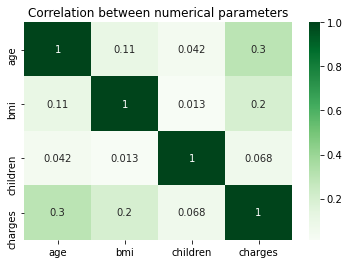

In [257]:
correlation = df[['age','bmi','children','charges']].corr()
sns.heatmap(correlation,annot=True,cmap='Greens')
plt.title('Correlation between numerical parameters')

+ The "charges" show a weak positive correlation with "age" or "bmi" or "children" parameters.
+ The highest correlation is that of charges - age, that's logic and as expected.

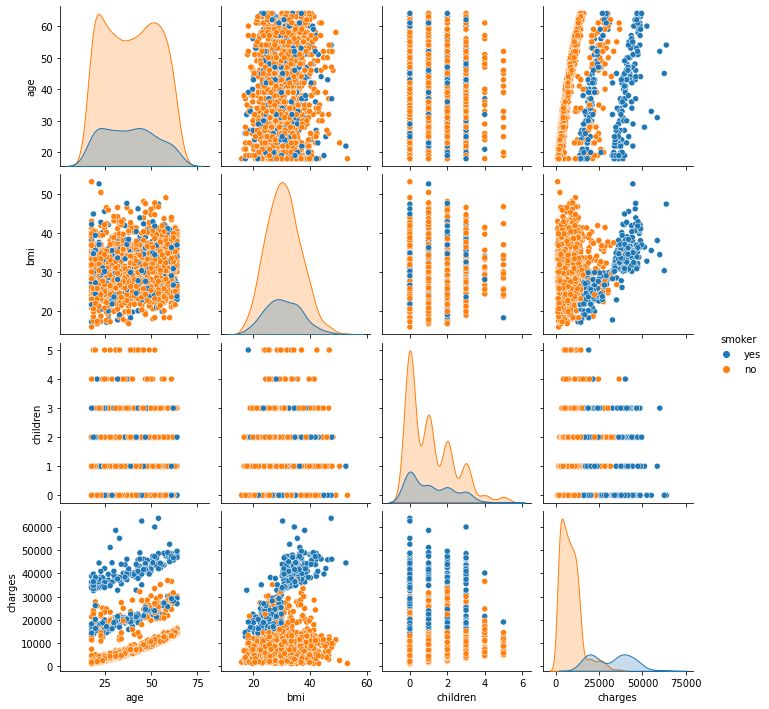

In [258]:
sns.pairplot(df,hue='smoker')

**b) Distribution of "charges":**

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

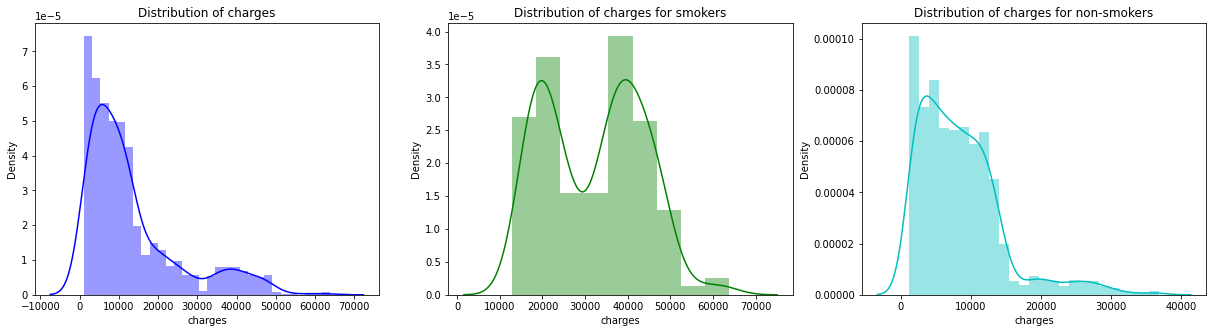

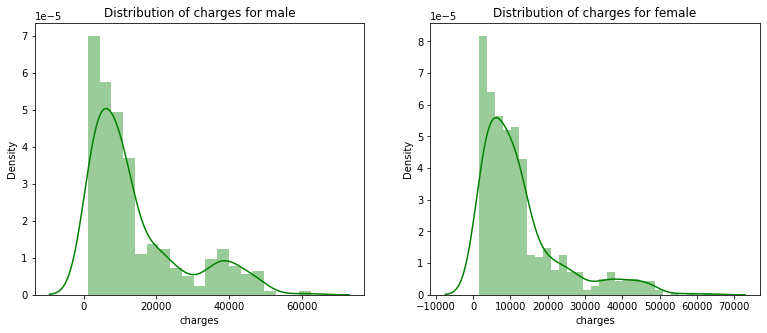

In [259]:
Plot_dis('charges')

+ Types of Distributions: *right skewed distribution* 
+ Most patients are being charged around **10,000**.
+ The right-skewness of charges indicates that there are few people who are being charged higher than average.

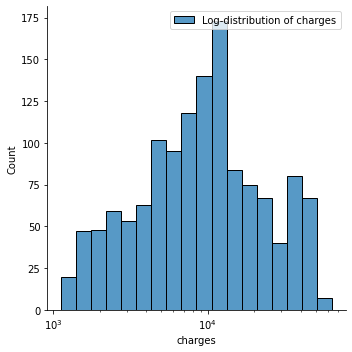

In [260]:
sns.displot(df['charges'],log_scale=True, label='Log-distribution of charges')
plt.legend()
plt.show()

+ Using "Log-scale" of charges could helps us have a "normal distribution" look on histogram.
+ Maximum number of patients is around 10,000 of charges.

**c)	Distribution of "bmi":**

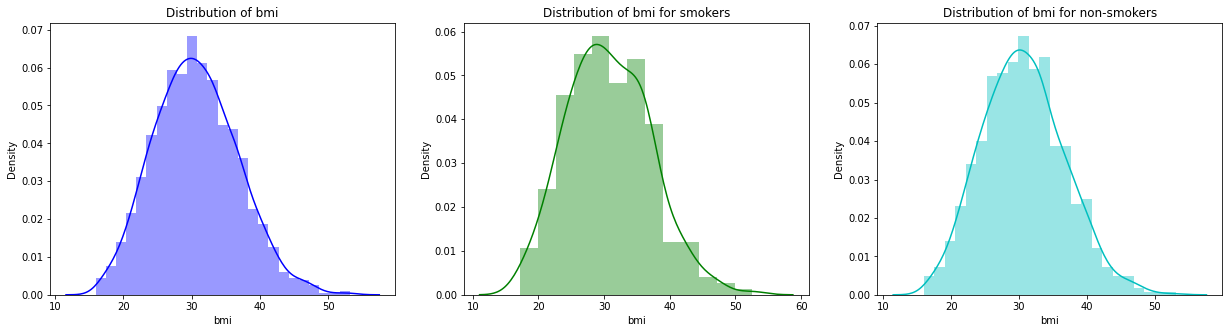

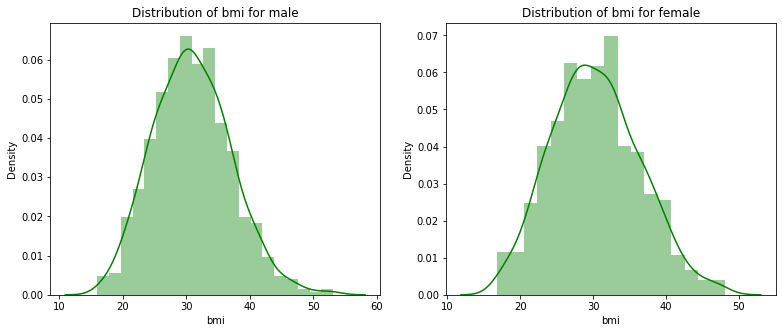

In [261]:
Plot_dis('bmi')

+ Types of Distributions: *normally distributed.*
+ BMI frequency: maximum number of patient around **bmi=30**.
+ Distribution of bmi of sex or smoker is almost same.

**d)	Distribution of "age":**

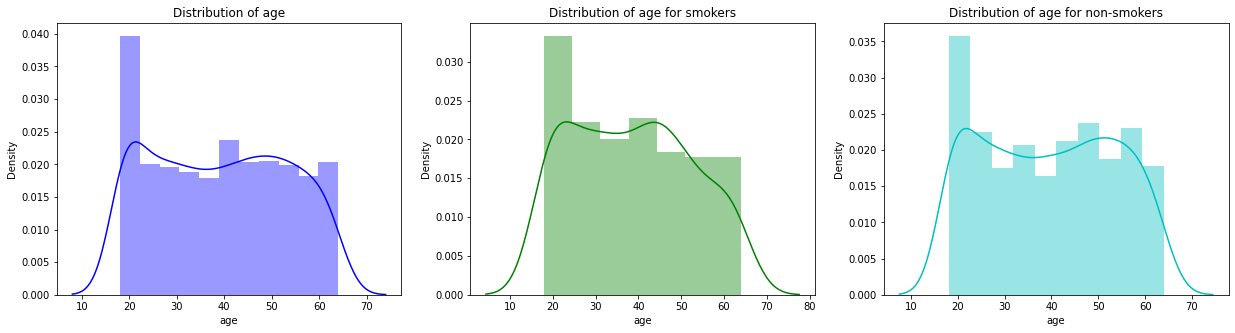

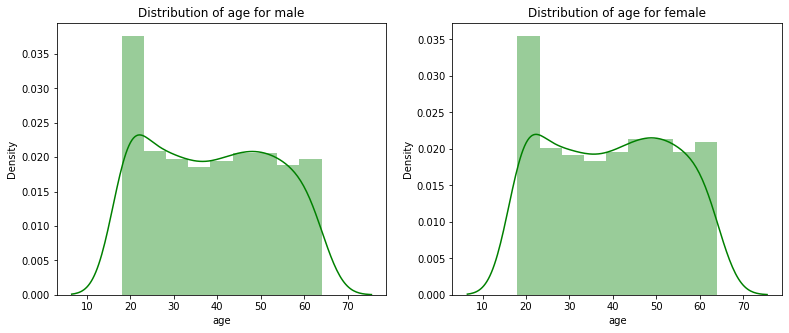

In [262]:
Plot_dis('age')

+ Type of distribution: *uniform distributed*
+ Maximum number of patients is around **20 years old**. 
+ Distribution of age of sex or smoker is almost same.
+ Special case study: age around 20 +/- 2.

# **3. Key parameters**

**a)	BMI and Weight category:**

The Body Mass Index (BMI) could be used to convert into other categorical variables as suggested by [ref]:
+ Under Weight:  BMI < 18.5
+ Normal Weight: 18.5 =< BMI < 24.9
+ Overweight:    25 =< BMI < 29.9
+ Obese:           BMI  >  30

[ref] https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

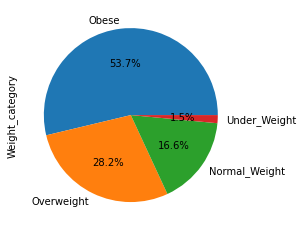

In [263]:
Bi = [18.5, 24.9, 29.9]
val = ['Under_Weight', 'Normal_Weight', 'Overweight','Obese']
Add_column('Weight_category','bmi', Bi, val)

+ Over 81% of patients are over-weight, and 53% of patients are obese. This ratio is too high than our expectation.

**b)	Age and Age category:**

According to several puplications, Patients could be categorized by age range as following:
+ Teen: age < 18 years; 
+ Youngs: 18 <= age < 35; 
+ Aldults: 35 <= age < 55, and 
+ Elders: age >= 55.

References:
https://cenique1.zendesk.com/hc/en-us/articles/202487549-What-are-the-age-ranges-for-youth-young-adult-adult-and-senior-in-IntelliSense-
https://academic.oup.com/gerontologist/article/42/1/92/641498 (DOI: 10.1093/geront/42.1.92).

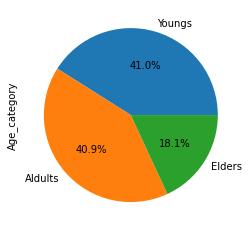

In [264]:
age = [18,35,55]
val = ['Teen', 'Youngs', 'Aldults','Elders']
Add_column('Age_category','age', age, val)

**c)	Charges vs other parameters**

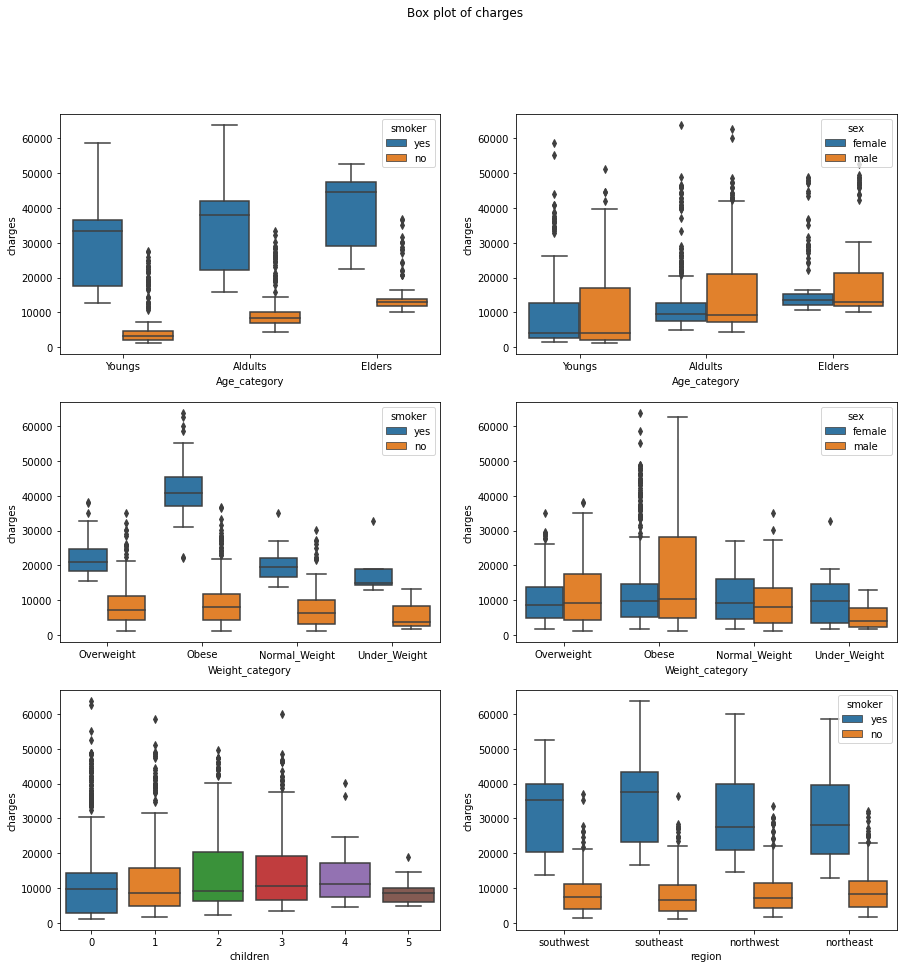

In [265]:
Plot_box('charges')

+ As expected, smokers pay a higher charges than non-smokers.
+ Age does have an slight effect on raising the charges, and again it is when combined with smoking that the charges get dramatically higher.
+ Charges is somehow fairly distributed between the families having 0-3 children, with some outliers of course. And it's very interesting that charges drops for families having more than 3 children. At least, there is question that larger families live healthier than those with less children?
+ Among obese-female we are seeing some "tails", this could be assumed that, obese-female might have serious diseases than obese-male.
+ The biggest effect on charges is the smoker category.

**d)	BMI vs other parameters**

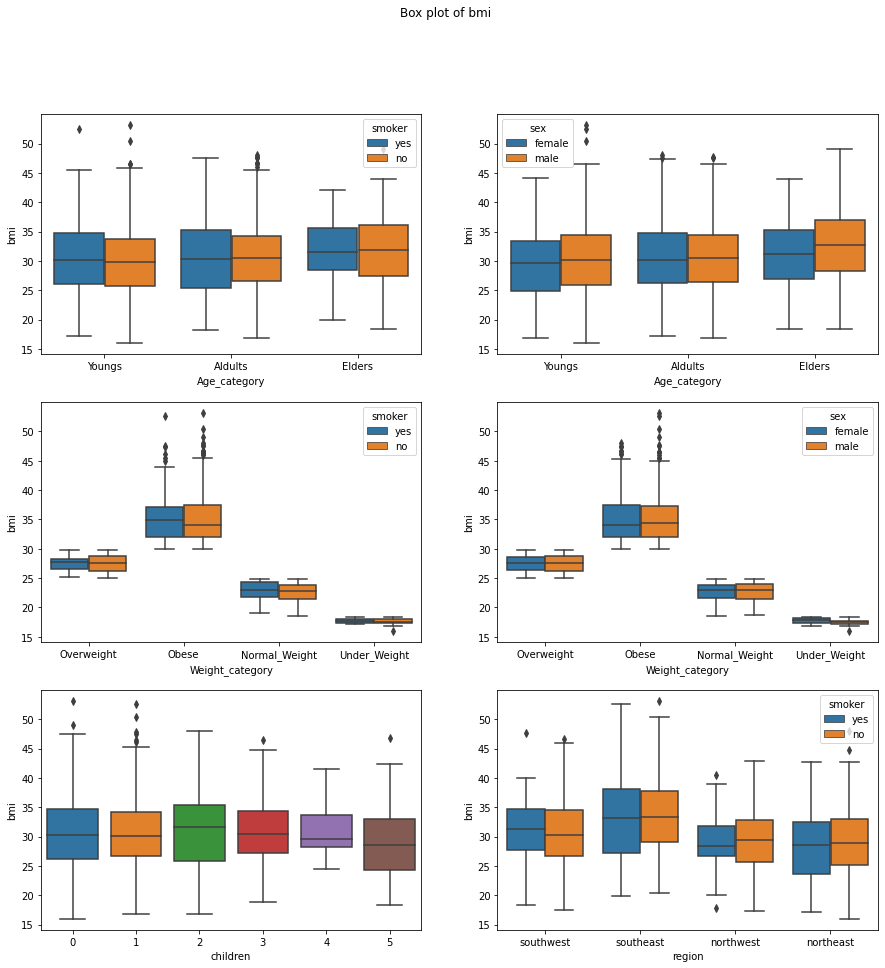

In [266]:
Plot_box('bmi')

+ Smoking doesn't seem to have an effect on the average bmi of gender or age of number of children or region.
+ Weight_category does have an effect on raising the bmi.

**e)	Special case study: age 18 to 22**

Text(0.5, 1.0, 'Box plot of charges of patients age from 60 to 65')

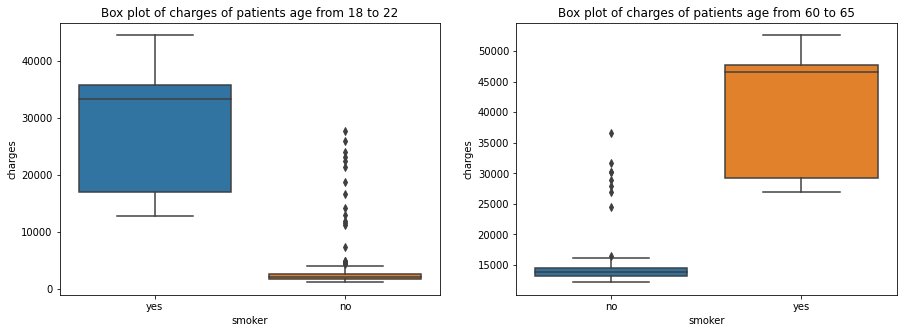

In [267]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.boxplot(y='charges',x='smoker', data=df[(df.age>=18)& (df.age<=22)],ax=ax)
ax.set_title('Box plot of charges of patients age from 18 to 22')

ax = f.add_subplot(122)
sns.boxplot(y='charges',x='smoker', data=df[(df.age>=60)& (df.age<=65)],ax=ax)
ax.set_title('Box plot of charges of patients age from 60 to 65')

+ As we can see, even at the age of 18-22, smoker-patients spend much more on treatment than non-smokers. The different ratio is such similar to that of the older group from 60-65 years old.
+ Among non-smokers we are seeing some "tails", this could be assumed that is due to other serious diseases or accidents.

# **4. Statistics**

**a)	Sex vs smoker**

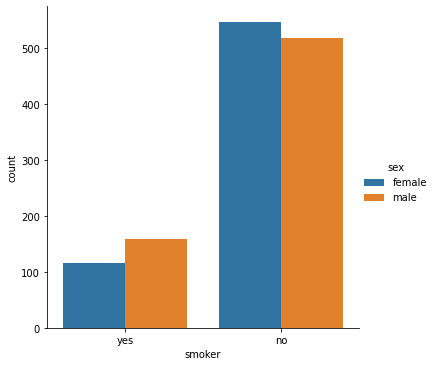

In [268]:
sns.catplot(hue='sex',kind='count',x='smoker',data=df)

+ There are more male smokers than female smokers, but not significant.
+ More non-smoker patients than smokers.

**b)	Children vs number of patients**

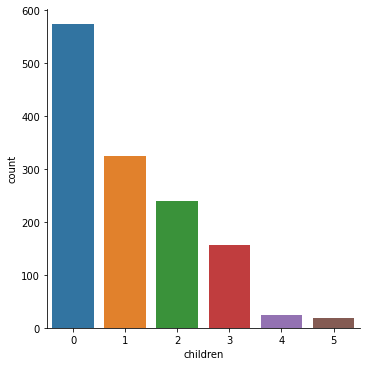

In [269]:
sns.catplot(x='children',kind='count',data=df)

+ Most of patients do not have children.

**c)	Region vs number of patients**

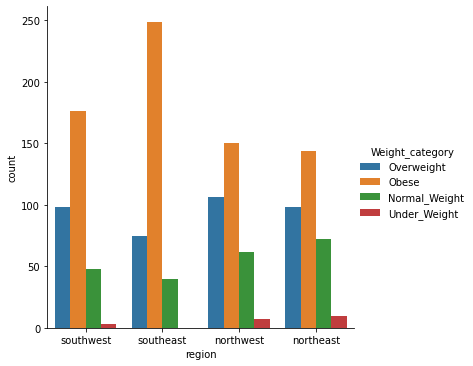

In [270]:
sns.catplot(x='region',kind='count',hue='Weight_category',data=df)

+ Most of Obese patients are in the southeast region. 

**d) Do charges of people who smoke differ significantly from the people who don't?**

In [271]:
Series_stats('charges','smoker','yes','no')

Two-sample t-test: t=32.75189, p=5.88946444671698e-103

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of yes-smoker and no-smoker are not equal.

 YES, the charges of yes-smoker differ significantly from no-smoker in the current dataset.

 The mean value of charges for yes-smoker is 32050.23 and for no-smoker is 8434.27


**e) Does charges of Obese differ significantly from that of under_weights?**

In [272]:
Series_stats('charges','Weight_category','Obese','Under_Weight')

Two-sample t-test: t=3.64693, p=0.0013542631838168704

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of Obese-Weight_category and Under_Weight-Weight_category are not equal.

 YES, the charges of Obese-Weight_category differ significantly from Under_Weight-Weight_category in the current dataset.

 The mean value of charges for Obese-Weight_category is 15460.5 and for Under_Weight-Weight_category is 8852.2


**f) Does charges of males differ significantly from that of females?**

In [273]:
Series_stats('charges','sex', 'male', 'female')

Two-sample t-test: t=2.10089, p=0.035841014956016645

 REJECT the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of male-sex and female-sex are not equal.

 YES, the charges of male-sex differ significantly from female-sex in the current dataset.

 The mean value of charges for male-sex is 13956.75 and for female-sex is 12569.58


**g) Does charges of Aldults differ significantly from that of Elders?**

In [274]:
Series_stats('charges','Age_category', 'Youngs','Elders')

Two-sample t-test: t=-10.01818, p=1.5222187109892808e-21

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of Youngs - Age_category and Elders - Age_category are equal.

 NO, the charges of Youngs-Age_category NOT differ significantly from Elders-Age_category in the current dataset

 The mean value of charges for Youngs-Age_category is 9673.32 and for Elders-Age_category is 18513.28


**h) Does BMI of males differ significantly from that of females?**

In [275]:
Series_stats('bmi','sex','male','female')

Two-sample t-test: t=1.69703, p=0.08992430667834876

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean bmi of male - sex and female - sex are equal.

 NO, the bmi of male-sex NOT differ significantly from female-sex in the current dataset

 The mean value of bmi for male-sex is 30.94 and for female-sex is 30.38


In [276]:
df.groupby('Weight_category').mean()

,age,bmi,children,charges
Weight_category,,,,
Normal_Weight,36.747748,22.584189,1.117117,10379.499732
Obese,40.361613,35.176725,1.102921,15460.496506
Overweight,38.816976,27.508077,1.068966,11030.331700
Under_Weight,32.350000,17.566250,1.050000,8852.200585


**i) Does BMI of Youngs differ significantly from that of Elders?**

In [277]:
Series_stats('bmi','Age_category', 'Youngs','Elders')

Two-sample t-test: t=-3.78896, p=0.0001695553738046629

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean bmi of Youngs - Age_category and Elders - Age_category are equal.

 NO, the bmi of Youngs-Age_category NOT differ significantly from Elders-Age_category in the current dataset

 The mean value of bmi for Youngs-Age_category is 30.05 and for Elders-Age_category is 31.76


**j) Does charges of northeast differ significantly from that of southeast?**

In [278]:
Series_stats('charges','region','northeast','southeast')

Two-sample t-test: t=-1.38016, p=0.16798984019177732

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of northeast - region and southeast - region are equal.

 NO, the charges of northeast-region NOT differ significantly from southeast-region in the current dataset

 The mean value of charges for northeast-region is 13406.38 and for southeast-region is 14735.41


**k) Does BMI of northeast differ significantly from that of southwest?**

In [279]:
Series_stats('bmi','region','northeast','southwest')

Two-sample t-test: t=-3.1167, p=0.001910080347826759

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean bmi of northeast - region and southwest - region are equal.

 NO, the bmi of northeast-region NOT differ significantly from southwest-region in the current dataset

 The mean value of bmi for northeast-region is 29.17 and for southwest-region is 30.6


**l) Does charges of patient without children differ significantly from that of having 2 children?**

In [280]:
Series_stats('charges','children',0,2)

Two-sample t-test: t=-2.78631, p=0.005572108190365014

 FAIL to Reject the Null Hypothesis and state that: 
 at 5% significance level, the mean charges of 0 - children and 2 - children are equal.

 NO, the charges of 0-children NOT differ significantly from 2-children in the current dataset

 The mean value of charges for 0-children is 12365.98 and for 2-children is 15073.56


# **5. Key factors correlation**

**a)	Correlation of charges in function of age and smoker & sex**

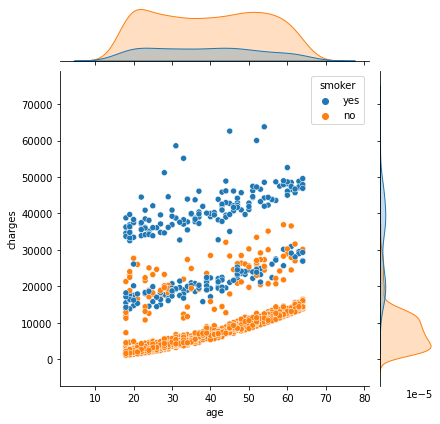

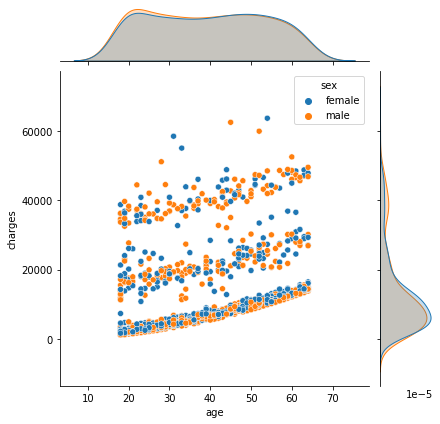

In [281]:
sns.jointplot(y='charges',x='age',hue='smoker',data=df)
sns.jointplot(y="charges", x="age", data=df,hue='sex')

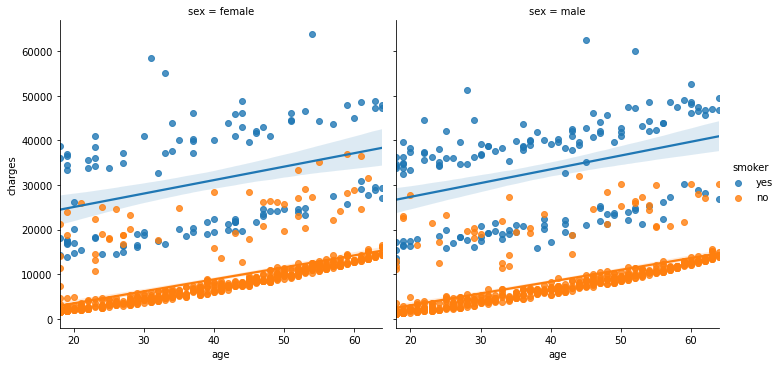

In [282]:
sns.lmplot(y='charges',x='age',hue='smoker',col='sex',data=df)

+ For non-smoker patients, the charges increases with age. That makes sense. 
+ Charges of smoker patients is nealy double that of non-smoker patients at the same age range.

**b)	Correlation of charges in function of age and smoker & weight**

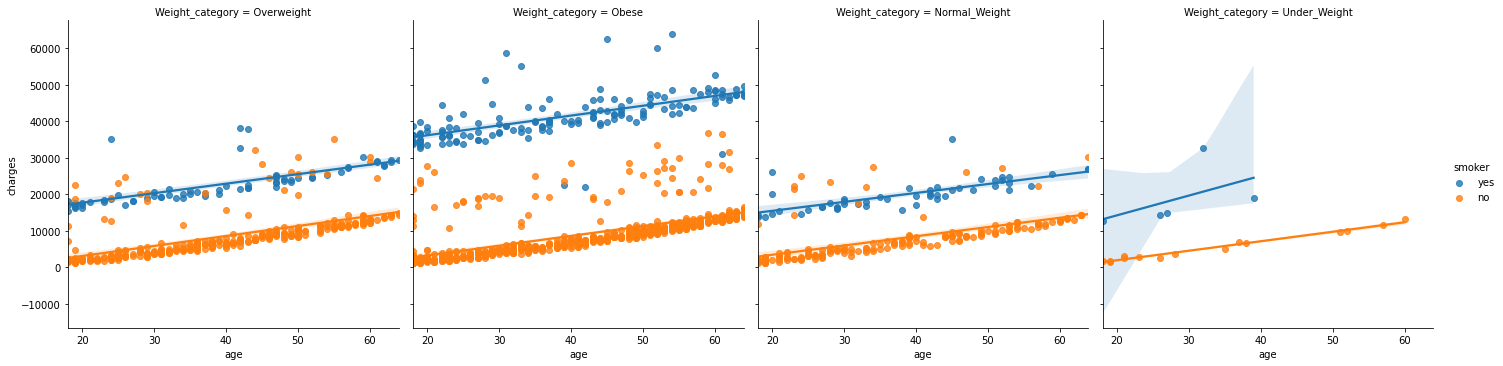

In [283]:
sns.lmplot(y='charges',x='age',col='Weight_category',hue='smoker', data=df)

+ A positive relationship between age and charges but a dramatically steeper hike for smokers in comparison to non-smokers. 
+ We can conclude that smoking significantly raises the charges, particularly for Obese patients (nearly double).

**c)	Correlation of charges in function of bmi and smoker & sex**

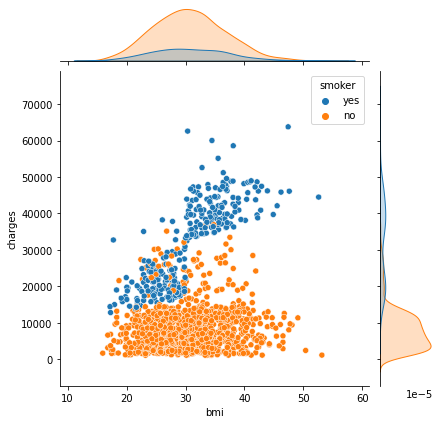

In [284]:
sns.jointplot(x="bmi", y="charges", data=df,hue='smoker')

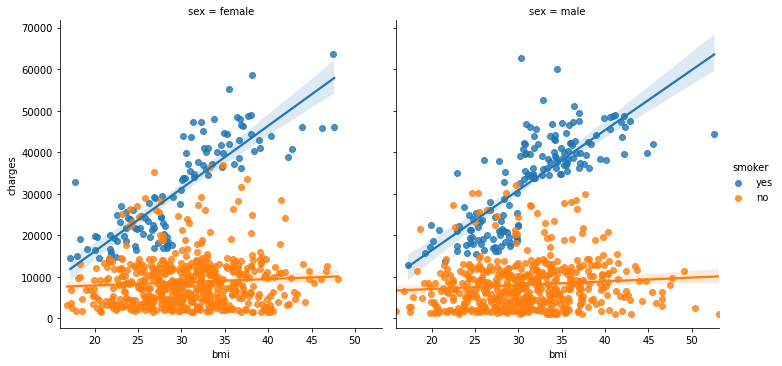

In [285]:
sns.lmplot(y='charges',x='bmi',hue='smoker',col='sex',data=df)

+ There is a dramatical increase in charges depending on the bmi of the smoker-patient.
+ For non-smoker patients, the correlation between bmi and charges is not clear.

**d)	Correlation of charges in function of bmi and children number**

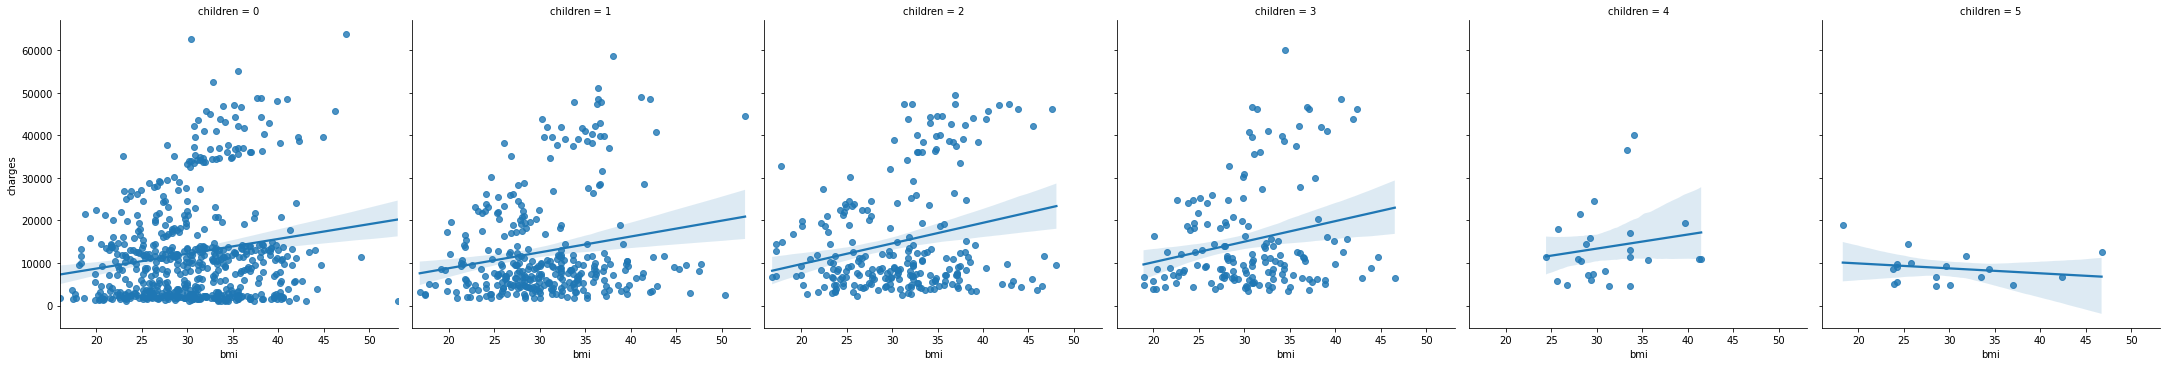

In [286]:
sns.lmplot(x='bmi',y='charges',col='children',data=df)

+ Perhaps a family with more children will be healthier and happier?

# **6. Conclusions and recommendations**

+ Charges is a positive correlation with "age" or "bmi".
+ Charges of smoker patients is much bigger than non-smokers, what ever the age is.
+ The are some outliers on non smokers and obese-female, this could be due to some serious disease or other specific reasons.
+ We can say that smoking is the main characteristic that definitely affects patient's charges. This parameter has an even greater impact on the charges of obese patients.
+ For final conclusion, we conclude that smoking is a very big problem for young adults today.

This project can be further expanded by collecting more data on the relationships between the number of children in the family, region category, some specific diseases, ... to the patient's charges.
These new data will further assist in making the overall correlation between several variables and the charges, leading to the development of a model to precisely predict the charges for patients.